# Imports

In [6]:
# imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import gc, joblib

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## import data

In [7]:
def import_data(seq_length):
    matrix_array = np.load(f'Data/matrix_array_{seq_length}_normalized.npy')
    answer_array = np.load(f'Data/answer_array_{seq_length}.npy')

    X = matrix_array
    y = answer_array

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=1, stratify=y)

    X_test_flattened = np.array([x.flatten() for x in X_test])

    y_test_transformed = np.array([1 if np.argmax(y) == 0 else (0 if np.argmax(y) == 2 else -1) for y in y_test])
    # answer = chunk.iloc[i+19][['plus_6', 'minus_6', 'zero_6']].tolist()
    # zero = 0, up = 1, down = -1
    y_test_transformed012 = np.array([1 if np.argmax(y) == 0 else (0 if np.argmax(y) == 2 else 2) for y in y_test])
    # 1 = up , 2 = down, 0 = zero

    del X, y, X_train, X_test, y_train, y_test, matrix_array, answer_array
    gc.collect()

    return X_test_flattened, y_test_transformed, y_test_transformed012


## test models

In [8]:
def test_model(model_name, seq_length):
    X_test_flattened, y_test_transformed, y_test_transformed012 = import_data(seq_length)
    print(f'import {seq_length} Data Done')

    if model_name == 'XGB':
        y_test_transformed = y_test_transformed012
        
    model = joblib.load(f'Models/{model_name}_model_{seq_length}.pkl')
    print(f'import {model_name} model Done')

    y_pred = model.predict(X_test_flattened)
    print('prediction Done')

    print(np.unique(y_pred))

    # Calculate accuracy
    accuracy = accuracy_score(y_test_transformed, y_pred)
    print(f"Accuracy: {accuracy}")

    # Print classification report
    report = classification_report(y_test_transformed, y_pred)
    print("Classification Report:")
    print(report)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test_transformed, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Plot the normalized confusion matrix
    sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues')
    plt.title(f'{model_name}_{seq_length} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.savefig(f'Figures/{model_name}_{seq_length}_Counfusion_Matrix.png')
    plt.show()

    # accuracy?
    wrong_count = cm[0][1]+cm[0][2] + cm[1][0]+cm[1][2] + cm[2][0]+cm[2][1]
    correct_count = cm[0][0] + cm[1][1] + cm[2][2]

    print(f'wrong count : {wrong_count}, correct count : {correct_count}')
    print(f'accuracy? : {100*correct_count/(wrong_count+correct_count)}') 
    '''
    data = pd.read_csv('Data/df_all.csv')
    data = data.drop(['Open time', 'Close time', 'Ignore','up_cross','down_cross','minutes','log_minutes','side','plus_6','minus_6','zero_6'], axis=1)
    print(data.columns)

    # Rename columns
    new_columns = []
    for i in range(seq_length):  # for each time step
        new_columns.extend([f"{col}_{i}" for col in ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume','MA5','MA10','MA20','MA30','MA60','MA120','MA240', 'BB0','BB+','BB-' ]])

    # Get feature importances
    importances = model.feature_importances_
    # Convert to a DataFrame
    feature_importance_df = pd.DataFrame({'Feature': new_columns, 'Importance': importances})

    # Sort by importance
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plot feature importances
    feature_importance_df.plot(kind='bar', x='Feature', y='Importance')
    plt.title('Feature Importances')
    plt.ylabel('Importance')
    plt.show()

    # Display the top N features in a bar chart
    top_n = 20  # You can adjust this number
    top_features = feature_importance_df.head(top_n)
    top_features.plot(kind='bar', x='Feature', y='Importance', figsize=(10, 6))
    plt.title('Top Feature Importances')
    plt.ylabel('Importance')
    plt.show()

    # Print the sorted list of features and their importances
    print("Sorted Feature Importances:")
    print(feature_importance_df.to_string(index=False))

    # Assuming importances and new_columns are defined
    feature_importance_df = pd.DataFrame({'Feature': new_columns, 'Importance': importances})

    # Split the feature names and aggregate importances
    feature_importance_df['BaseFeature'] = feature_importance_df['Feature'].apply(lambda x: x.split('_')[0])
    aggregated_importances = feature_importance_df.groupby('BaseFeature')['Importance'].sum()

    # Sort by importance
    aggregated_importances = aggregated_importances.sort_values(ascending=False)

    # Plot aggregated feature importances
    aggregated_importances.head(20).plot(kind='bar', figsize=(10, 6))
    plt.title('Aggregated Feature Importances')
    plt.ylabel('Importance')
    plt.show()

    # Print the sorted list of aggregated features and their importances
    print("Sorted Aggregated Feature Importances:")
    print(aggregated_importances.to_string())
    '''

## predictions

import 20 Data Done
import RFC model Done


[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.


prediction Done
[-1  0  1]
Accuracy: 0.7932340535422227
Classification Report:
              precision    recall  f1-score   support

          -1       0.81      0.66      0.72     14542
           0       0.78      0.93      0.85     29636
           1       0.81      0.64      0.72     13907

    accuracy                           0.79     58085
   macro avg       0.80      0.74      0.76     58085
weighted avg       0.80      0.79      0.79     58085



[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.2s finished


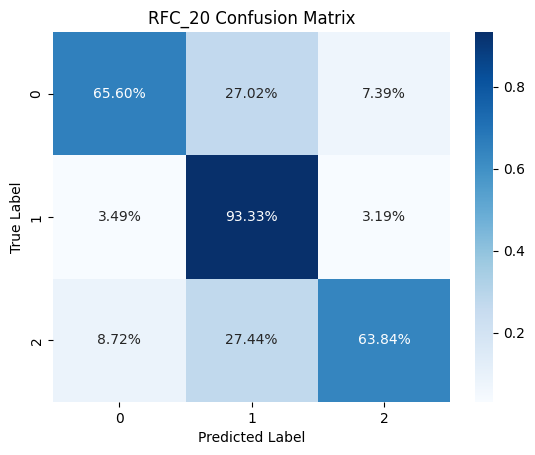

wrong count : 12010, correct count : 46075
accuracy? : 79.32340535422226
import 40 Data Done
import RFC model Done


[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.


prediction Done
[-1  0  1]
Accuracy: 0.7882989166939359
Classification Report:
              precision    recall  f1-score   support

          -1       0.80      0.65      0.72     14539
           0       0.78      0.93      0.85     29633
           1       0.81      0.63      0.71     13891

    accuracy                           0.79     58063
   macro avg       0.80      0.74      0.76     58063
weighted avg       0.79      0.79      0.78     58063



[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.2s finished


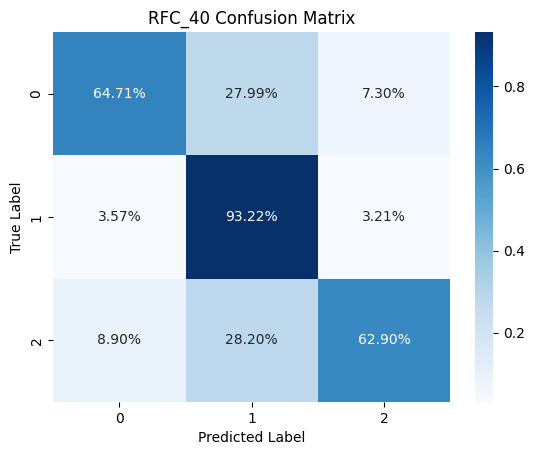

wrong count : 12292, correct count : 45771
accuracy? : 78.82989166939359
import 60 Data Done
import RFC model Done


[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.


prediction Done
[-1  0  1]
Accuracy: 0.7897176134112093
Classification Report:
              precision    recall  f1-score   support

          -1       0.80      0.65      0.72     14537
           0       0.78      0.93      0.85     29629
           1       0.81      0.63      0.71     13875

    accuracy                           0.79     58041
   macro avg       0.80      0.74      0.76     58041
weighted avg       0.79      0.79      0.78     58041



[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.3s finished


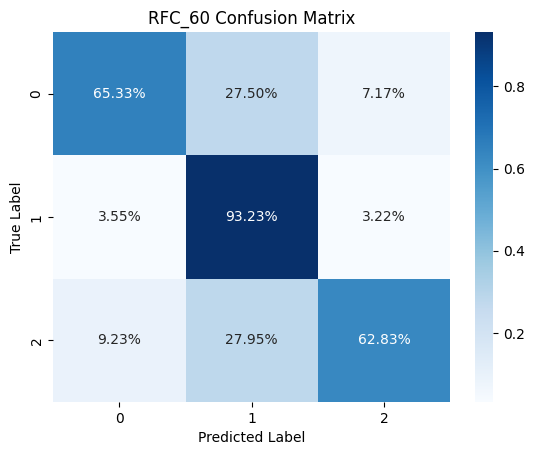

wrong count : 12205, correct count : 45836
accuracy? : 78.97176134112094
import 80 Data Done
import RFC model Done


[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.


prediction Done
[-1  0  1]
Accuracy: 0.7917923438873472
Classification Report:
              precision    recall  f1-score   support

          -1       0.80      0.66      0.72     14536
           0       0.78      0.93      0.85     29621
           1       0.82      0.63      0.71     13862

    accuracy                           0.79     58019
   macro avg       0.80      0.74      0.76     58019
weighted avg       0.79      0.79      0.79     58019



[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.3s finished


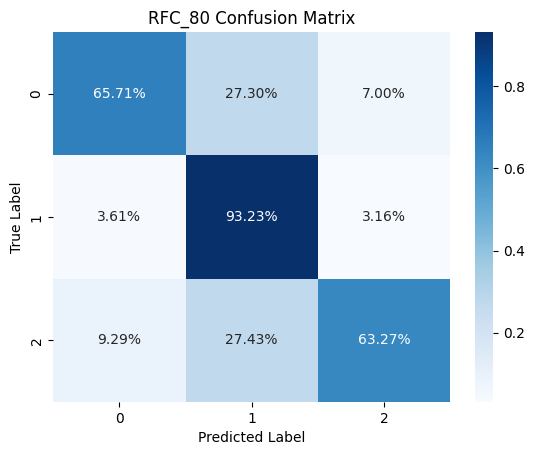

wrong count : 12080, correct count : 45939
accuracy? : 79.17923438873473


In [5]:
seq_lengths = [20,40,60,80]
models = [
    'RFC', 
    # 'XGB',
    ]

for seq_length in seq_lengths:
    for model_name in models:
        test_model(model_name, seq_length)

In [9]:
def test_model2(i):
    X_test_flattened, y_test_transformed, y_test_transformed012 = import_data(20)
    print(f'import 20 Data Done')
        
    model = joblib.load(f'Models/RFC_model_rank_{i}.pkl')
    print(f'import rank_{i} model Done')

    y_pred = model.predict(X_test_flattened)
    print('prediction Done')

    print(np.unique(y_pred))

    # Calculate accuracy
    accuracy = accuracy_score(y_test_transformed, y_pred)
    print(f"Accuracy: {accuracy}")

    # Print classification report
    report = classification_report(y_test_transformed, y_pred)
    print("Classification Report:")
    print(report)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test_transformed, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Plot the normalized confusion matrix
    sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues')
    plt.title(f'RFC_model_rank_{i} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.savefig(f'Figures/RFC_model_rank_{i}_Counfusion_Matrix.png')
    plt.show()

    # accuracy?
    wrong_count = cm[0][1]+cm[0][2] + cm[1][0]+cm[1][2] + cm[2][0]+cm[2][1]
    correct_count = cm[0][0] + cm[1][1] + cm[2][2]

    print(f'wrong count : {wrong_count}, correct count : {correct_count}')
    print(f'accuracy? : {100*correct_count/(wrong_count+correct_count)}') 

import 20 Data Done
import rank_1 model Done


[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 144 tasks      | elapsed:    0.3s


prediction Done
[-1  0  1]
Accuracy: 0.8398209520530258
Classification Report:
              precision    recall  f1-score   support

          -1       0.87      0.73      0.80     14542
           0       0.82      0.95      0.88     29636
           1       0.87      0.72      0.79     13907

    accuracy                           0.84     58085
   macro avg       0.85      0.80      0.82     58085
weighted avg       0.84      0.84      0.84     58085



[Parallel(n_jobs=28)]: Done 300 out of 300 | elapsed:    0.7s finished


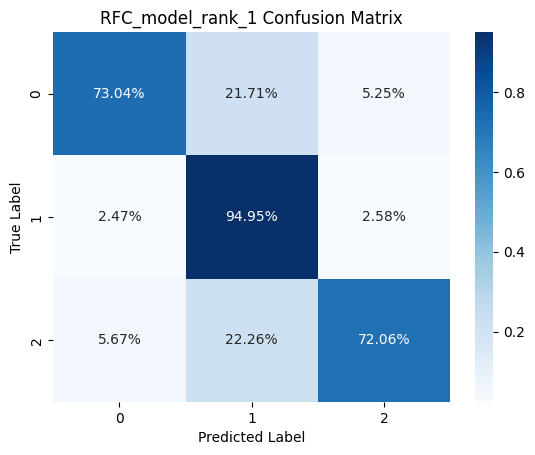

wrong count : 9304, correct count : 48781
accuracy? : 83.98209520530257
import 20 Data Done
import rank_2 model Done


[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 144 tasks      | elapsed:    0.3s
[Parallel(n_jobs=28)]: Done 200 out of 200 | elapsed:    0.4s finished


prediction Done
[-1  0  1]
Accuracy: 0.8392356029956098
Classification Report:
              precision    recall  f1-score   support

          -1       0.87      0.73      0.80     14542
           0       0.82      0.95      0.88     29636
           1       0.86      0.72      0.78     13907

    accuracy                           0.84     58085
   macro avg       0.85      0.80      0.82     58085
weighted avg       0.84      0.84      0.84     58085



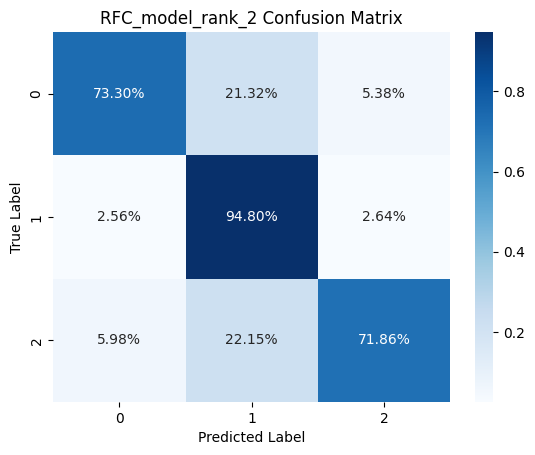

wrong count : 9338, correct count : 48747
accuracy? : 83.92356029956099
import 20 Data Done
import rank_3 model Done


[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 144 tasks      | elapsed:    0.3s


prediction Done
[-1  0  1]
Accuracy: 0.8355857794611345
Classification Report:
              precision    recall  f1-score   support

          -1       0.87      0.72      0.79     14542
           0       0.81      0.95      0.88     29636
           1       0.86      0.71      0.78     13907

    accuracy                           0.84     58085
   macro avg       0.85      0.79      0.82     58085
weighted avg       0.84      0.84      0.83     58085



[Parallel(n_jobs=28)]: Done 300 out of 300 | elapsed:    0.6s finished


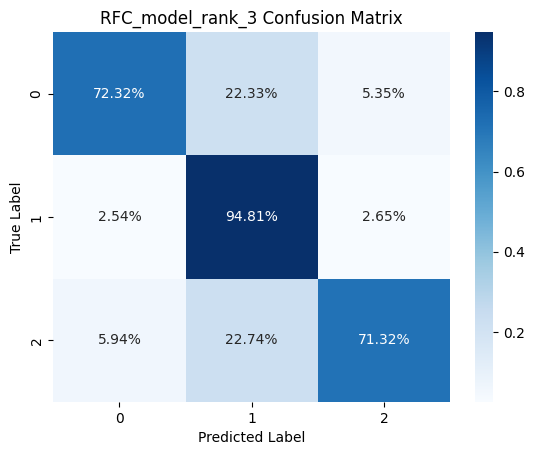

wrong count : 9550, correct count : 48535
accuracy? : 83.55857794611346
import 20 Data Done
import rank_4 model Done


[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 144 tasks      | elapsed:    0.3s
[Parallel(n_jobs=28)]: Done 200 out of 200 | elapsed:    0.4s finished


prediction Done
[-1  0  1]
Accuracy: 0.8343806490488078
Classification Report:
              precision    recall  f1-score   support

          -1       0.87      0.72      0.79     14542
           0       0.81      0.95      0.88     29636
           1       0.86      0.71      0.78     13907

    accuracy                           0.83     58085
   macro avg       0.85      0.79      0.81     58085
weighted avg       0.84      0.83      0.83     58085



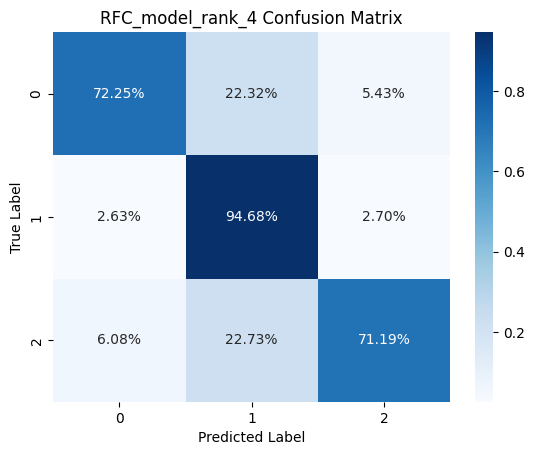

wrong count : 9620, correct count : 48465
accuracy? : 83.43806490488078
import 20 Data Done
import rank_5 model Done


[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 144 tasks      | elapsed:    0.3s


prediction Done
[-1  0  1]
Accuracy: 0.8353275372299217
Classification Report:
              precision    recall  f1-score   support

          -1       0.87      0.72      0.79     14542
           0       0.81      0.95      0.88     29636
           1       0.86      0.72      0.78     13907

    accuracy                           0.84     58085
   macro avg       0.85      0.79      0.82     58085
weighted avg       0.84      0.84      0.83     58085



[Parallel(n_jobs=28)]: Done 300 out of 300 | elapsed:    0.6s finished


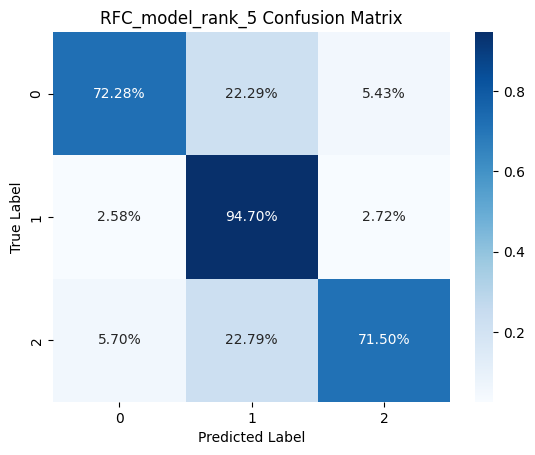

wrong count : 9565, correct count : 48520
accuracy? : 83.53275372299217


In [10]:
for i in range(1,6):
    test_model2(i)

In [17]:
# Define the column names
column_names = [
    "index", "mean_fit_time", "std_fit_time", "mean_score_time",
    "std_score_time", "param_bootstrap", "param_max_depth",
    "param_min_samples_leaf", "param_min_samples_split", "param_n_estimators",
    "params", "split0_test_score", "split1_test_score", "split2_test_score",
    "mean_test_score", "std_test_score", "rank_test_score"
]

# Load the CSV file
results_df = pd.read_csv('Data/grid_search_results.csv', names=column_names)

# If you had saved the file without headers and want to add them:
results_df.to_csv('Data/grid_search_results_with_headers.csv', index=False)



In [19]:
results_sorted = results_df.sort_values(by='rank_test_score')
results_sorted['params'][0]

"{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}"